# MODEL

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import binarize
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt
import datetime
%matplotlib inline

pd.options.display.max_columns = None

In [2]:
MAIN = pd.read_csv('PREPDATA.csv')

In [3]:
X = MAIN.copy()

DropCol = [
    'Serial Number',
    'Resigned',
    'EduAllowYearDiff',
    'EduAllowFinishedIn1y',
]
X.drop(DropCol, axis=1, inplace=True)

X

BSC Indicator  Is MPT  Is Re-Entry  Exp at Action  Age at Action  \
0                 0       1            0      43.502604      59.839696   
1                 0       0            0      37.668125      59.839696   
2                 0       1            0      36.592127      59.426272   
3                 0       1            0      37.421713      59.836958   
4                 0       0            0      40.586733      59.836958   
5                 0       1            0      33.752918      60.830818   
6                 0       1            0      34.837129      59.836958   
7                 0       1            0      33.503768      59.251046   
8                 0       1            0      33.084868      59.420796   
9                 0       1            0      33.084868      58.169572   
10                0       1            0      36.088352      59.836958   
11                0       1            0      34.169079      55.672601   
12                0       0            0      33.175219      59.839696   
13                0       0            0      37.755738      55.511065   
14                0       0            0      34.174555      59.502933   
15                0       1            0      31.921258      55.584988   
16                0       1            0      32.838457      54.837539   
17                0       1            0      39.921422      59.836958   
18                0       1            0      34.251217      59.836958   
19                0       0            0      38.588061      59.839696   
20                0       0            0      30.921922      58.506335   
21                0       1            0      33.169743      59.839696   
22                0       1            0      30.839785      60.839032   
23                0       0            0      31.997919      56.669199   
24                0       0            0      32.923332      55.669863   
25                0       1            0      32.504432      59.836958   
26                0       1            0      36.170489      59.839696   
27                0       1            0      32.589307      59.839696   
28                0       1            0      35.001403      59.839696   
29                0       1            0      34.839867      59.839696   
...             ...     ...          ...            ...            ...   
3684              1       1            0       0.084875      29.254536   
3685              1       1            0       0.084875      22.667132   
3686              1       1            0       0.084875      23.504932   
3687              1       1            0       0.084875      29.503686   
3688              1       1            0       0.084875      22.256446   
3689              1       1            0       0.084875      24.085368   
3690              1       1            0       0.084875      20.750597   
3691              1       1            0       0.084875      24.170243   
3692              1       1            0       0.084875      25.667878   
3693              1       1            0       0.084875      25.002567   
3694              1       1            0       0.084875      23.422794   
3695              1       1            0       0.084875      23.918356   
3696              1       1            0       0.084875      26.004641   
3697              1       1            0       0.084875      23.337919   
3698              1       1            0       0.084875      22.505596   
3699              1       1            0       0.084875      22.667132   
3700              1       1            0       0.002738      23.918356   
3701              1       1            0       0.002738      22.919020   
3702              1       1            0       0.084875      23.337919   
3703              1       1            0       0.002738      23.836218   
3704              1       1            0       0.084875      26.256528   
3705              1       1            0       0.002738      24.665804   
3706      

In [4]:
y = MAIN['Resigned']

y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3684    0
3685    0
3686    0
3687    0
3688    0
3689    0
3690    0
3691    0
3692    0
3693    0
3694    0
3695    0
3696    0
3697    0
3698    0
3699    0
3700    0
3701    0
3702    0
3703    0
3704    0
3705    0
3706    0
3707    0
3708    0
3709    0
3710    0
3711    0
3712    0
3713    0
Name: Resigned, Length: 3714, dtype: int64

In [5]:
# Train - Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

## Decision Tree

In [6]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       757
          1       0.72      0.73      0.73       469

avg / total       0.79      0.79      0.79      1226

[[626 131]
 [127 342]]


Text(0,0.5,'Frequency')

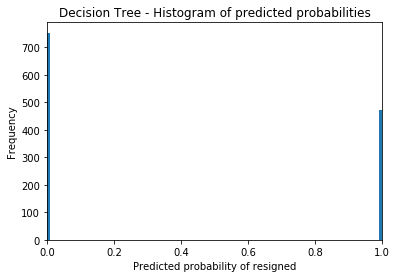

In [7]:
dtree_pred_prob = dtree.predict_proba(X_test)[:, 1]
plt.hist(dtree_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Decision Tree - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

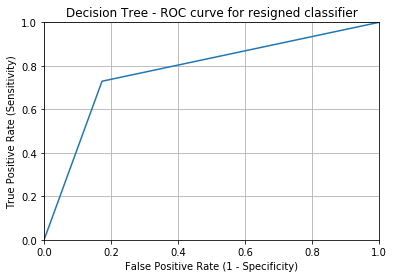

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, dtree_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Decision Tree - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [9]:
cross_val_score(dtree, X, y, cv=10, scoring='roc_auc').mean()

0.64978428029130386

## Random Forest

In [10]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.84      0.87      0.86       757
          1       0.78      0.73      0.76       469

avg / total       0.82      0.82      0.82      1226

[[662  95]
 [125 344]]


Text(0,0.5,'Frequency')

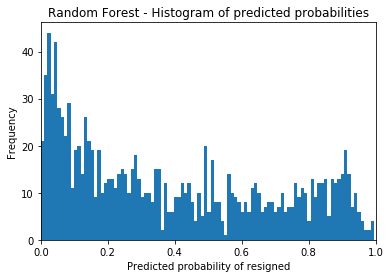

In [11]:
rfc_pred_prob = rfc.predict_proba(X_test)[:, 1]
plt.hist(rfc_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Random Forest - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

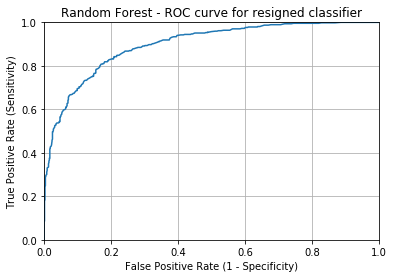

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [13]:
cross_val_score(rfc, X, y, cv=10, scoring='roc_auc').mean()

0.79843950206608216

# Mean decrease impurity

In [14]:
names = X_train.columns

rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

feature_imp = (sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

In [15]:
df = pd.DataFrame(feature_imp)
df

0                   1
0   0.1253       Exp at Action
1   0.1046       Age at Action
2   0.0975   SUP Exp at Action
3   0.0931     Year After Grad
4   0.0757   SUP Age at Action
5   0.0644       BSC Indicator
6   0.0634   Age Diff SUPvsEMP
7   0.0619        VAC_Vacation
8   0.0516              days1Y
9   0.0459             count1Y
10  0.0345            VAC_Sick
11  0.0311              days3M
12  0.0249             count3M
13  0.0177        VAC_Personal
14  0.0168          VAC_Others
15  0.0154          MAX Degree
16  0.0093              Is MPT
17  0.0086             Is STEM
18  0.0080        SUP Gender_M
19  0.0078        SUP Gender_F
20  0.0077            Gender_M
21  0.0072            Gender_F
22  0.0070  SUP Older Than EMP
23  0.0058       EDU Allowance
24  0.0052              Is SUP
25  0.0025       VAC_Maternity
26  0.0024         Is Re-Entry
27  0.0022          House Loan
28  0.0019   VAC_DependentCare
29  0.0005          SUP Is MPT

## Logistic Regression

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print(acc_log)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

78.14
             precision    recall  f1-score   support

          0       0.81      0.84      0.82       757
          1       0.73      0.68      0.70       469

avg / total       0.78      0.78      0.78      1226

[[637 120]
 [152 317]]


Text(0,0.5,'Frequency')

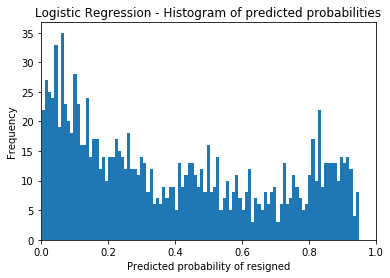

In [17]:
logreg_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(logreg_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Logistic Regression - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

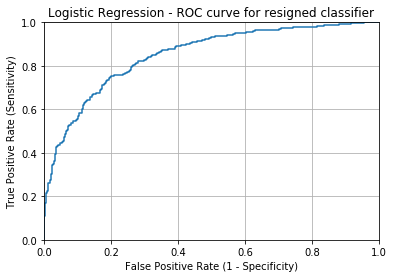

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [19]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82244028692502713

In [20]:
print(logreg.coef_)

[[-2.00772857  0.77244134 -0.13794752 -0.08394755 -0.0326689   1.15694139
  -0.04016941 -0.01451646 -0.45053951  0.13620161  0.6364353   0.32872798
   0.44390893 -0.21703273  0.01815244  0.1002007  -0.54163755 -0.29005907
   0.34986411  0.01622255  0.1429611   0.06033852 -0.02965884 -0.02900104
   0.01046848 -0.02654949  0.00994491  0.00361411 -0.06728109 -0.32521471]]


## SVC

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print(acc_svc)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

94.57
             precision    recall  f1-score   support

          0       0.76      0.90      0.82       757
          1       0.77      0.53      0.63       469

avg / total       0.76      0.76      0.75      1226

[[682  75]
 [221 248]]


In [22]:
cross_val_score(svc, X, y, cv=10, scoring='roc_auc').mean()

0.74086047569397251